# Môn: Lập trình cho Khoa học dữ liệu - 18_21

# Đồ án cuối kỳ

**Nhóm 17 - Thông tin thành viên:**
- Trần Hữu Chí Bảo - 18120288
- Trần Xuân Quý - 18120231

---

# 1. Thu thập dữ liệu



Tập dữ liệu được sử dụng trong đồ án của nhóm có chủ đề về ước tính tuổi thọ trung bình của người dân các quốc gia trên thế giới qua các năm và các yếu tố liên quan và/hoặc có thể gây ảnh hưởng. Tập dữ liệu này được thu thập và [đăng tải trên Kaggle](https://www.kaggle.com/mmattson/who-national-life-expectancy?fbclid=IwAR0eTr_kf9ivkOLZmJvJ5ULfjFIqAPGPKVsacqXq1TbR1yWxUTZEShQVTnQ) bởi người dùng MMattson với giấy phép `Creative Common Public Domain - CC0` cho phép sử dụng tập dữ liệu tùy ý mà không cần xin phép. 

Theo mô tả, tập dữ liệu trên được thu thập từ 2 nguồn là `GHO - Global Health Observatory` và `UNESCO`, với các số liệu trong khoảng thời gian từ năm 2000 - 2016. Về phần dữ liệu từ UNESCO tác giả đã truy cập vào trang web về dữ liệu Thống kê về Giáo dục các Quốc gia của Viện thống kê UNESCO và thu thập dữ liệu thủ công. Dữ liệu từ GHO được thu thập sử dụng thư viện request thông qua GHO OData API portal.

---
# 2. Import các thư viện cần thiết
Trong đồ án, ngoài những thư viện đẵ có trong môi trường `p4ds`, nhóm sẽ sử dụng thêm các thư viện sau:
- `seaborn`: thư viện tập trung hỗ trợ vẽ các biểu đồ thống kê giúp cho các câu lệnh thực hiện vẽ biểu đồ đơn giản, ngắn gọn hơn.
- `statsmodels`: hỗ trợ phân tích thống kê, qua đó có thể hiểu rõ hơn một biến phụ thuộc có thể được biểu diễn bởi các biến độc lập theo công thức nào và liệu công thức đó có ý nghĩa không.

In [ ]:
!conda install -c conda-forge seaborn statsmodels -y

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
from scipy import stats

pd.set_option("display.max_columns", None)

---
# 3. Khám phá dữ liệu

In [2]:
data_df = pd.read_csv('who_life_exp.csv')
data_df

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,NaN,60.0,28.0,42.0,42.25467,NaN,NaN,2290.0,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,NaN,59.0,22.0,47.0,43.37680,NaN,NaN,2690.0,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,NaN,44.0,21.0,46.0,44.36387,NaN,NaN,2820.0,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,NaN,43.0,18.0,47.0,45.35134,0.621,NaN,3080.0,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,Lao People's Democratic Republic,LAO,Western Pacific,2012,64.49448,16.57977,209.2666,0.055840,0.004845,6.29833,22.4,9.2,3.1,79.0,72.0,78.0,79.0,72.07056,1.800,NaN,4170.0,0.43670,2.07638,6444.530,47.5,65.267,0.3,4570.0,22.7,1.82147,NaN,NaN
3107,Lao People's Democratic Republic,LAO,Western Pacific,2013,64.79716,16.64219,205.1459,0.055350,0.004600,6.42186,22.6,9.1,3.5,87.0,82.0,86.0,87.0,74.05544,4.493,2.24529,4570.0,0.71266,2.39985,6541.304,45.6,65.717,0.3,4980.0,NaN,3.23381,NaN,NaN
3108,Lao People's Democratic Republic,LAO,Western Pacific,2014,65.10757,16.70787,200.8204,0.054585,0.004405,6.64447,22.7,9.0,3.8,88.0,87.0,88.0,88.0,76.02924,4.949,NaN,NaN,0.68373,2.29846,6639.756,43.7,66.144,0.3,5440.0,NaN,2.93781,NaN,NaN
3109,Lao People's Democratic Republic,LAO,Western Pacific,2015,65.45008,16.77074,196.6613,0.053465,0.004160,6.83826,22.8,8.9,4.2,81.0,83.0,80.0,81.0,77.99142,NaN,NaN,NaN,0.86391,2.45366,6741.164,42.0,66.546,0.3,5810.0,NaN,NaN,84.66104,NaN


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Dữ liệu có 3111 dòng và 32 cột

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng mang thông tin về tuổi thọ trung bình của người dân một quốc gia trong một năm và các yếu tố khác liên quan như là chỉ số khối cơ thể, lượng cồn tiêu thụ trung bình, tỷ lệ người dân có nước sạch cơ bản, đạt miễn dịch một số loại bệnh, một số thông tin về nền kinh tế quốc gia, ...
Có vẻ không có dòng nào có ý nghĩa khác so với các dòng còn lại.

## Dữ liệu có các dòng bị lặp không?

In [5]:
have_duplicate = data_df.duplicated()
have_duplicate.sum()

0

Vậy là không có dòng nào trong tập dữ liệu bị trùng.

## Mỗi cột có ý nghĩa gì?

Theo mô tả trên trang web tập dữ liệu, mỗi cột có ý nghĩa:
- **country**: tên quốc gia.
- **country_code**: mã quốc gia 3 chữ cái.
- **region**: khu vực của quốc gia.
- **year**: năm của số liệu.
- **life_expect**, **une_life**: tuổi thọ trung bình ước tính của một người tính từ khi mới ra đời.
- **life_exp60**: thời gian trung bình ước tính theo năm một người từ 60 tuổi có thể sống.
- **adult_mortality**: tỷ lệ tử vong ở người trưởng thành (số người chết trong khoảng 15 - 60 tuổi/1000 người)
- **infant_mort**: tỷ lệ tử vong ở trẻ sơ sinh dưới 1 tuổi.
- **age1-4mort**: tỷ lệ tử vong ở trẻ sơ sinh từ 1 - 4 tuổi.
- **alcohol**: lượng cồn nguyên chất tiêu thụ ở người $\geq 15$ tuổi(lít).
- **bmi**: chỉ số khối cơ thể trung bình với người $\geq 18$ tuổi.
- **age5-19thinness**: tỷ lệ % số người 5 - 19 tuổi có cơ thể gầy, (BMI < median - 2s.d)
- **age5-19obesity**: tỷ lệ % số người 5 - 19 tuổi có cơ thể béo phì, (BMI > median + 2s.d)
- **hepatitis**: tỷ lệ tiêm phòng viêm gan B cho trẻ em trong khoảng 1 tuổi.
- **measles**: tỷ lệ tiêm phòng sởi liều đầu tiên cho trẻ em trong khoảng 1 tuổi.
- **polio**: tỷ lệ tiêm phòng bại liệt cho trẻ em trong khoảng 1 tuổi.
- **diphtheria**: tỷ lệ trẻ em dưới 1 tuổi được tiêm phòng bạch hầu, uốn ván và ho gà.
- **basic_water**: tỷ lệ người dân được sử dụng nước sạch.
- **doctors**: số lượng bác sĩ/10000 dân.
- **hospitals**: số bệnh viện trên 100000 người dân.
- **gni_capita**, **une_gni**: thu nhập quốc dân (ngàn USD)
- **gghe-d**: đầu tư công vào lĩnh vực y tế (%GDP)
- **che_gdp**: chi phí của người dân chi cho sản phẩm, dịch vụ y tế (%GDP)
- **une_pop**: dân số (1000 người)
- **une_infant**: số ca tử vong/1000 ca sinh.
- **une_hiv**: tỷ lệ người từ 15 - 49 tuổi nhiễm HIV.
- **une_poverty**: % dân số có thu nhập $\leq \$1.90$/ngày
- **une_edu_spend**: %GDP đầu tư công vào giáo dục.
- **une_literacy**: % dân số $\geq 15$ tuổi biết chữ.
- **une_school**: thời gian đi học trung bình (năm) của người dân $\geq 25$ tuổi.

Các cột có tên bắt đầu là `une` là cột có dữ liệu từ UNESCO, các cột khác được thu thập từ GHO.

## Mỗi cột hiện đang có kiểu dữ liệu gì?

In [3]:
data_df.dtypes

country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
hospitals          float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_literacy       float64
une_school         float64
dtype: object

Các cột đều có kiểu dữ liệu đúng với ý nghĩa, không có cột nào có kiểu dữ liệu không hợp lệ.

## Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

Ngoài 3 cột "country", "country_code", "region" có kiểu định danh còn có cột year có kiểu dữ liệu số nhưng mang ý nghĩa định danh.

In [3]:
def missing_ratio(df):
    return df.isna().mean() * 100

In [4]:
cate_info = data_df.iloc[:, :4].astype('str').describe(include=['object'])
cate_info = pd.concat([data_df.iloc[:, :4].agg([missing_ratio]), cate_info,
                      data_df.iloc[:, :4].agg([pd.Series.nunique, pd.Series.unique])])
cate_info

,country,country_code,region,year
missing_ratio,0.0,0.0,0.0,0.0
count,3111,3111,3111,3111
unique,183,183,6,17
top,Mozambique,KHM,Europe,2001
freq,17,17,850,183
nunique,183,183,6,17
unique,"[Angola, Burundi, Benin, Burkina Faso, Botswan...","[AGO, BDI, BEN, BFA, BWA, CAF, TZA, UGA, ZAF, ...","[Africa, Americas, Eastern Mediterranean, Euro...","[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200..."


Các cột đều không có giá trị thiếu. Tuy nhiên cần xem xét kĩ hơn cột "year" để đảm bảo dữ liệu được thu thập trong cùng khoảng thời gian.

In [7]:
data_df[['year']].groupby('year').size()

year
2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2013    183
2014    183
2015    183
2016    183
dtype: int64

Các cột định danh không có giá trị thiếu nào. Đối với cột "year" không có giá trị thiếu nghĩa là các quốc gia đều có các dòng dữ liệu ứng với các năm từ 2000 - 2016, không quốc gia nào bị thiếu dữ liệu ở năm nào.

## Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Như tìm hiểu ở trên, chĩ có 3 cột country, country_code và region là có kiểu dữ liệu object, cùng với cột year có kiểu dữ liệu số nhưng mang ý nghĩa định danh, các cột còn lại đều mang ý nghĩa về số liệu, tỷ lệ.

In [5]:
num_df = data_df.select_dtypes(exclude='object').drop(columns='year')
num_describe = pd.concat([num_df.agg([missing_ratio]), num_df.describe()])
num_describe

,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,1.607200,1.092896,1.092896,1.092896,18.289939,0.610736,0.610736,0.610736,1.028608,42.783671,95.821279,21.922212,3.214401,3.760849,1.189328e+00,0.000000,0.000000,23.818708,3.760849,70.652523,41.337191,81.645773,74.124076
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,2542.000000,3092.000000,3092.000000,3092.000000,3079.000000,1780.000000,130.000000,2429.000000,3011.000000,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.000000,571.000000,805.000000
mean,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,85.436271,85.540427,86.608991,86.420116,83.332011,19.866038,2.044878,13397.146974,3.122935,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.532930,81.984472,9.712214
std,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,17.099786,15.282246,14.943226,15.332160,19.255119,14.071207,5.059339,16258.593973,2.091720,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.754280,19.665588,2.854723
min,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,2.000000,16.000000,8.000000,19.000000,18.695210,0.128000,0.000000,250.000000,0.062360,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.787440,14.376040,0.559340
25%,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,81.000000,79.000000,81.000000,82.000000,71.658310,6.391250,0.535162,2540.000000,1.533445,4.238798,2.195105e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.262830,72.701130,7.735940
50%,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,92.000000,92.000000,93.000000,93.000000,91.994080,20.523500,1.072725,7460.000000,2.601300,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.425410,90.953740,10.270400
75%,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,97.000000,96.000000,97.000000,97.000000,98.552870,30.981750,2.104830,18250.000000,4.278110,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.494980,95.786975,12.070610
max,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,99.000000,99.000000,99.000000,99.000000,100.000010,79.541000,56.446950,123860.000000,12.062730,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.059080,99.998190,14.378800


**Nhận xét:**
- Có một số cột như là "hospitals", "une_poverty", "une_literacy", "une_school" có tỷ lệ thiếu trên 50%. Với những thuộc tính như vậy thì khó có thể khám phá, phân tích để có được thông tin hữu ích, do đó không thể sử dụng tiếp những cột trên vào việc khám phá và phân tích.
- Có 2 cột "infant_mort" và "une_infant" cùng thông tin về tỷ lệ tử vong của trẻ em dưới 1 tuổi, với cột "infant_mort" sử dụng đơn vị % còn cột "une_infant" sử dụng đơn vị *số người/1000 người*. Cột "une_infant" có các giá trị trong đoạn [1.6, 142.4], rộng hơn so với khoảng [0.001, 0.165] của "infant_mort". Do đó khi cần sử dụng thông tin về tỷ lệ tử vong của trẻ em dưới 1 tuổi nên ưu tiên xài cột "une_infant".

## Tỷ lệ giá trị thiếu của các cột qua từng năm như thế nào?

Nhìn kĩ hơn vào tỷ lệ giá trị thiếu với từng năm để giúp lựa chọn khoảng thời gian dữ liệu tốt để phân tích, cùng với đó giúp chọn cột để xóa với những cặp thuộc tính cùng nội dung.

In [7]:
missing_by_year = data_df.groupby('year').apply(missing_ratio)
missing_by_year

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278689,1.092896,1.092896,1.092896,54.098361,1.639344,1.639344,1.639344,3.825137,53.551913,100.000000,7.650273,4.918033,5.464481,1.092896,0.0,0.0,24.043716,5.464481,81.967213,38.251366,76.502732,91.803279
2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278689,1.092896,1.092896,1.092896,48.633880,1.639344,1.639344,1.639344,3.278689,57.377049,100.000000,6.010929,4.918033,5.464481,0.546448,0.0,0.0,24.043716,4.918033,81.967213,42.076503,84.153005,88.524590
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278689,1.092896,1.092896,1.092896,38.797814,1.092896,1.092896,1.092896,2.185792,55.737705,100.000000,5.464481,4.371585,4.918033,1.092896,0.0,0.0,24.043716,3.825137,74.863388,38.251366,89.617486,90.710383
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278689,1.092896,1.092896,1.092896,28.961749,1.092896,1.092896,1.092896,2.185792,55.737705,100.000000,5.464481,3.278689,3.825137,1.092896,0.0,0.0,24.043716,3.825137,73.224044,44.808743,93.989071,93.989071
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278689,1.092896,1.092896,1.092896,25.136612,1.092896,1.092896,1.092896,2.185792,32.786885,100.000000,4.371585,2.732240,3.278689,1.092896,0.0,0.0,24.043716,3.825137,68.306011,38.797814,87.431694,85.245902
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.185792,1.092896,1.092896,1.092896,20.218579,1.092896,1.092896,1.092896,1.092896,45.355191,100.000000,3.825137,2.732240,3.278689,1.092896,0.0,0.0,24.043716,3.825137,66.120219,44.262295,89.071038,82.513661
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.092896,1.092896,1.092896,1.092896,18.032787,0.546448,0.546448,0.546448,0.546448,47.540984,100.000000,3.825137,2.732240,3.278689,1.639344,0.0,0.0,24.043716,3.825137,66.666667,44.808743,86.338798,73.770492
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.092896,1.092896,1.092896,1.092896,13.114754,0.546448,0.546448,0.546448,0.546448,41.530055,100.000000,3.825137,2.732240,3.278689,1.092896,0.0,0.0,24.043716,3.825137,68.306011,45.355191,81.420765,71.584699
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.092896,1.092896,1.092896,1.092896,10.928962,0.546448,0.546448,0.546448,0.546448,28.961749,100.000000,3.278689,2.732240,3.278689,1.092896,0.0,0.0,24.043716,3.825137,67.759563,37.704918,82.513661,66.120219


Vậy là cột "gni_capita" có giá trị thiếu nhiều hơn so với cột "une_gni", đặc biệt 3 năm 2014 - 2016 không có giá trị nào. Do đó cột "gni_capita" không hữu ích bằng cột "une_gni". Khi cần sử dụng thông tin về thu nhập quốc dân nên ưu tiên dùng cột "une_gni".

## Các quốc gia được xếp vào những khu vực nào?

Nhìn qua một số giá trị của cột "region" có vẻ như đây không mô tả quốc gia thuộc châu lục nào, ví dụ như nước Lào có khu vục là Tây Thái Bình Dương - Western Pacific thay vì Đông Nam Á. Do đó nhóm tìm hiểu kĩ hơn về những khu vực khác nhau trong tập dữ liệu.

In [8]:
country_region_df = data_df[['country', 'region']]
country_region_df.drop_duplicates().groupby('region').size()

region
Africa                   47
Americas                 33
Eastern Mediterranean    21
Europe                   50
South-East Asia          11
Western Pacific          21
dtype: int64

Các quốc gia trong tập dữ liệu được xếp vào 6 khu vực: châu Phi, châu Mỹ, Đông Địa Trung Hải, châu Âu, Đông Nam Á và Tây Thái Bình Dương. Dường như vùng Đông Nam Á trong tập dữ liệu này không chỉ các nước như Việt Nam, Thái Lan, Singapore, ... Hiển thị các quốc gia được xếp vào nhóm Đông Nam Á và Tây Thái Bình Dương.

In [9]:
country_region_df[country_region_df.region == 'South-East Asia'].country.unique()

array(['Bangladesh', 'Bhutan', 'Indonesia', 'India', 'Sri Lanka',
       'Maldives', 'Myanmar', 'Nepal',
       "Democratic People's Republic of Korea", 'Thailand', 'Timor-Leste'],
      dtype=object)

In [10]:
country_region_df[country_region_df.region == 'Western Pacific'].country.unique()

array(['Australia', 'Brunei Darussalam', 'China', 'Fiji',
       'Micronesia (Federated States of)', 'Tonga', 'Viet Nam', 'Vanuatu',
       'Samoa', 'Philippines', 'Papua New Guinea', 'Singapore',
       'Solomon Islands', 'Mongolia', 'Malaysia', 'New Zealand', 'Japan',
       'Cambodia', 'Kiribati', 'Republic of Korea',
       "Lao People's Democratic Republic"], dtype=object)

Có thể vùng Đông Nam Á trong tập dữ liệu này thể hiện những quốc gia ở phía Đông và phía Nam châu Á.
## Tuổi thọ trung bình ở các châu lục qua các năm thay đổi như thế nào?

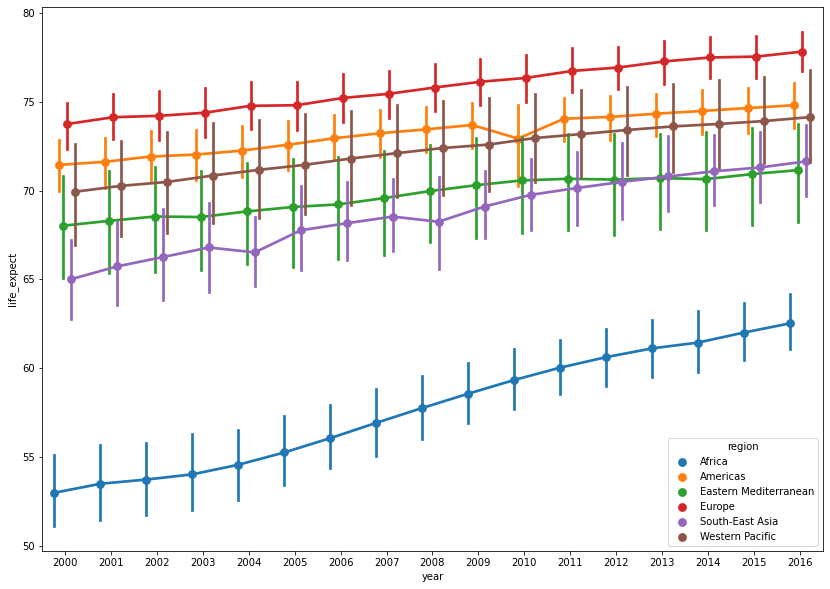

In [16]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.pointplot(x=data_df.year, y=data_df.life_expect, hue=data_df.region, ax=ax, dodge=0.45)
fig.show()
plt.close(fig)

In [19]:
plt.close(fig)

**Nhận xét:**
- Tuổi thọ trung bình của các quốc gia ở châu lục khác nhau đều tăng dần qua các năm.
- Khu vực châu Mỹ và Đông Nam Á lần lượt có 1 và 2 lần tuổi thọ trung bình giảm.Tại những lần giảm trên chêch lệch tuổi thọ giữa các quốc gia luôn lớn hơn những năm khác.
- Khu vực Đông Địa Trung Hải có chênh lệch tuổi thọ lớn nhất.

## Trung bình tỷ lệ trẻ em dưới 1 tuổi được tiêm phòng ở các khu vực thay đổi như thế nào.

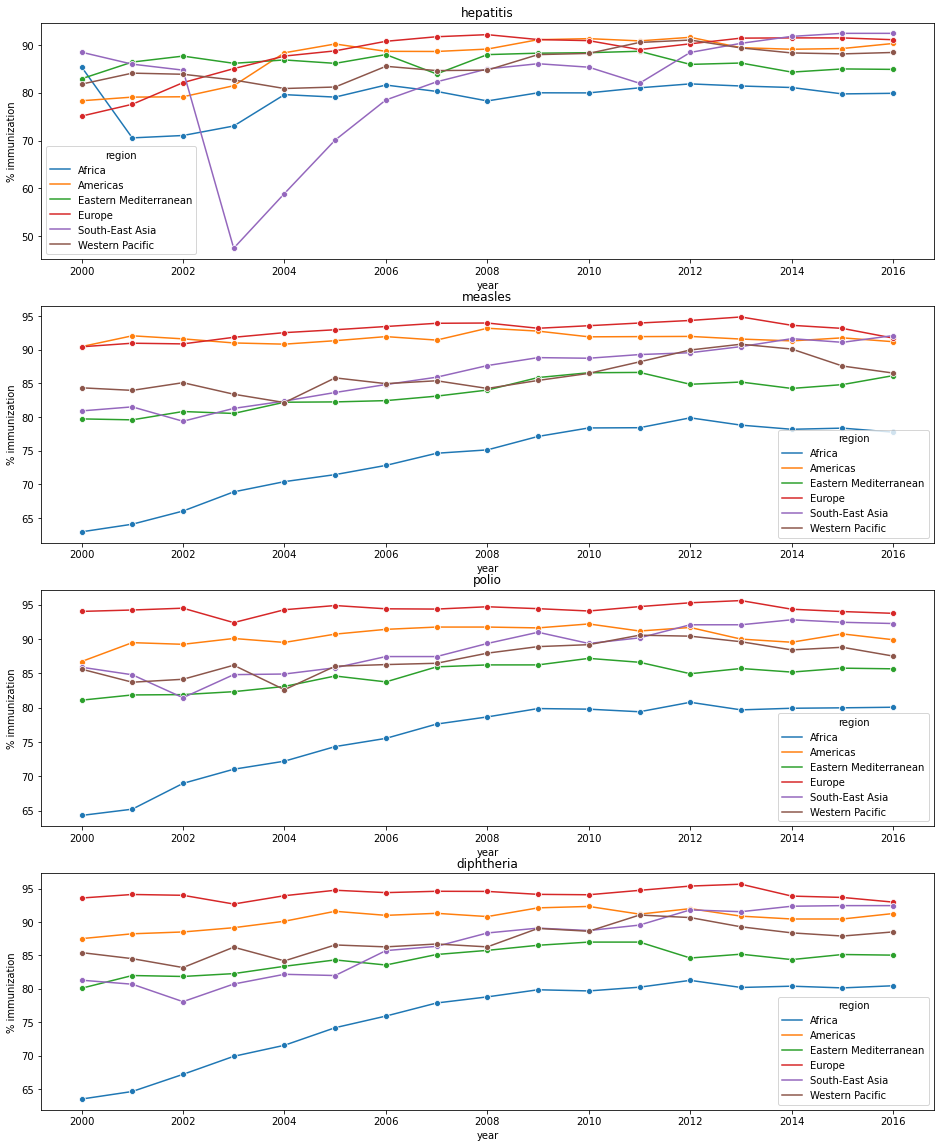

In [19]:
cols = data_df.columns[13:17]
regions = data_df.region.unique()
nrows = cols.size

fig, axes = plt.subplots(nrows, figsize=(16, 20))
for i, col in enumerate(cols):
    sns.lineplot(data=data_df, x='year', y=col, hue='region',
                  ax=axes[i], marker='o', ci=None)
        
    axes[i].set_title(col)
    axes[i].set_ylabel('% immunization')
fig.show()

In [18]:
plt.close(fig)

**Nhận xét:**
- Nhìn chung tỷ lệ tiêm phòng bệnh viêm gan B, sởi, bại liệt, bạch hầu, uốn ván và ho gà ở các khu vực đều tăng trong giai đoạn 2000 - 2016
- Châu Phi là khu vục có xuất phát điểm khá thấp, ngoại trừ viêm gan B thì những bệnh khác đều có tỷ lệ tiêm phòng ~65% vào năm 2000. Tuy nhiên qua các năm cũng thấy được sự cải thiện rõ ràng.
- Khu vực châu Âu và châu Mỹ có tỉ lệ tiêm phòng được duy trì ổn định ở mức cao.

## Tỷ lệ tử vong của trẻ em dưới 1 tuổi ở các khu vực vào năm 2000 so với 2016 khác nhau thế nào?

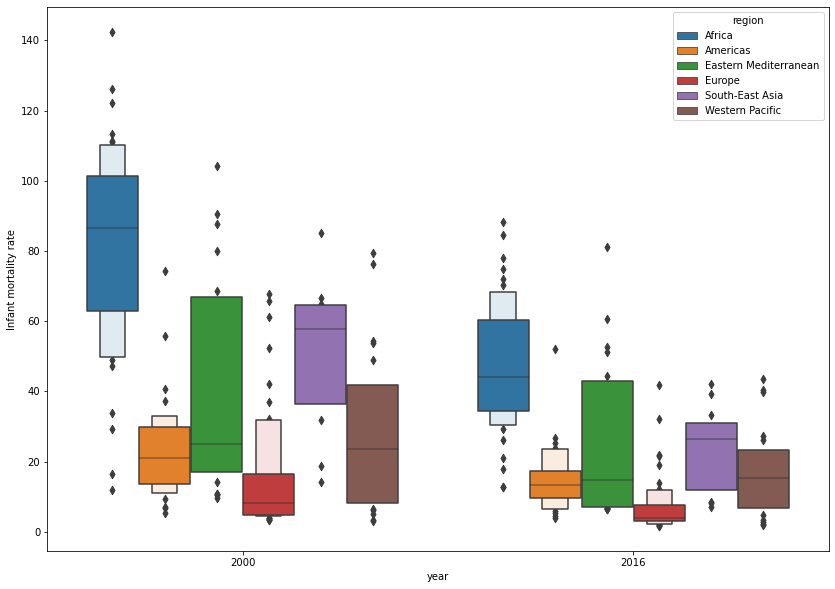

In [8]:
df = data_df.loc[(data_df.year == 2000) | (data_df.year == 2016), ['region', 'year', 'une_infant']]

fig, ax = plt.subplots(figsize=(14, 10))
sns.boxenplot(data=df, x='year', y='une_infant', hue='region', ax=ax)
ax.set_ylabel('Infant mortality rate')
fig.show()

In [29]:
plt.close(fig)

**Nhận xét:**
- Các quốc gia đều có tỷ lệ trẻ em tử vong cải thiện hơn ở năm 2016 so với năm 2000.
- Châu Phi vẫn là khu vực có tỷ lệ tử vong cao nhất trong giai đoạn 2000 - 2016. 
- So với năm 2000, phân bố tỷ lệ tử vong ở nam8 2016 của châu Phi đã chuyển từ xiên trái sang xiên phải, các khu vực khác vẫn giữ nguyên.
---
# 4. Đưa ra câu hỏi cần trả lời
## Câu hỏi 1.
**Câu hỏi đặt ra là:** Số tiền đầu tư cho lĩnh vực y tế có quan hệ như thế nào đến tỷ lệ trẻ em dưới 1 tuổi được tiêm phòng vắc-xin ở các nhóm thu nhập quốc dân khác nhau?

**Trả lời được câu hỏi này** giúp nhóm phần nào hiểu được tác động của riêng sự đầu tư của chính quyền các quốc gia vào lĩnh vực y tế đối với tỷ lệ tiêm vắc xin phòng bệnh của các quốc gia như thế nào.

**Các bước thực hiện:**
1. Tính trung bình thu nhập quốc dân các quốc gia trong giai đoạn trên:
2. Chia nhóm thu nhập quốc dân cho các quốc gia:
3. Tạo DataFrame gồm các cột cần sử dụng:
4. Thể hiện quan hệ giữa tỷ lệ %GDP đầu tư công cho lĩnh vực y tế lần lượt so với các tỷ lệ tiêm phòng bệnh viêm gan B, sởi, bại liệt và nhóm bạch hầu, uốn ván và ho gà cho từng nhóm thu nhập quốc dân.
    
**Bước 1.** Tính trung bình thu nhập quốc dân các quốc gia trong giai đoạn trên.
- Lấy cột "country_code", "une_gni".
- Gom nhóm theo cột "country_code".
- Tính trung bình "une_gni" cho từng nhóm.

In [3]:
country_gni = data_df[['country_code', 'une_gni']].groupby('country_code').mean()
country_gni

,une_gni
country_code,
AFG,1763.750000
AGO,4911.176471
ALB,8070.000000
ARE,72211.176471
ARG,15750.588235
...,...
WSM,5017.333333
YEM,3501.176471
ZAF,10616.470588


**Bước 2.** Chia nhóm thu nhập quốc dân cho các quốc gia theo các phân vị.

| Nhóm thu nhập | Khoảng phân vị |
| :-----------: | :------------: |
| Thấp | 0 - 25th |
| Trung bình thấp | 25th - 50th |
| Trung bình cao | 50th - 75th |
| Cao | 75th - 100th |

In [4]:
labels = ['low', 'lower middle', 'upper middle', 'high']
gni_groups = pd.qcut(country_gni.une_gni, 4, labels, duplicates='drop')
gni_groups

country_code
AFG             low
AGO    lower middle
ALB    lower middle
ARE            high
ARG    upper middle
           ...     
WSM    lower middle
YEM    lower middle
ZAF    upper middle
ZMB             low
ZWE             low
Name: une_gni, Length: 183, dtype: category
Categories (4, object): ['low' < 'lower middle' < 'upper middle' < 'high']

**Bước 3.** Tạo DataFrame gồm các cột cần sử dụng.
- Truy xuất các cột: "country_code", "year", "hepatitis", "measles", "polio", "diphtheria", "gghe-d" từ DataFrame `data_df`.
- Ghép Series chứa thông tin nhóm thu nhập các quốc gia vào DataFrame trên.

In [5]:
immunization_gghe_df = data_df.iloc[:, [1, 3] + list(range(13, 17)) + [21]]
immunization_gghe_df = immunization_gghe_df.join(gni_groups, 'country_code')
immunization_gghe_df

,country_code,year,hepatitis,measles,polio,diphtheria,gghe-d,une_gni
0,AGO,2000,NaN,32.0,21.0,31.0,1.11099,lower middle
1,AGO,2001,NaN,60.0,28.0,42.0,2.04631,lower middle
2,AGO,2002,NaN,59.0,22.0,47.0,1.30863,lower middle
3,AGO,2003,NaN,44.0,21.0,46.0,1.46560,lower middle
4,AGO,2004,NaN,43.0,18.0,47.0,1.68663,lower middle
...,...,...,...,...,...,...,...,...
3106,LAO,2012,79.0,72.0,78.0,79.0,0.43670,lower middle
3107,LAO,2013,87.0,82.0,86.0,87.0,0.71266,lower middle
3108,LAO,2014,88.0,87.0,88.0,88.0,0.68373,lower middle
3109,LAO,2015,81.0,83.0,80.0,81.0,0.86391,lower middle


In [7]:
immunization_cols = immunization_gghe_df.columns[2:6]

**Bước 4.** Thể hiện quan hệ giữa tỷ lệ %GDP đầu tư công cho lĩnh vực y tế lần lượt so với các tỷ lệ tiêm phòng bệnh viêm gan B, sởi, bại liệt và nhóm bạch hầu, uốn ván và ho gà cho từng nhóm thu nhập quốc dân.
- Vẽ biểu đồ phân tán kết hợp với đường hồi quy.

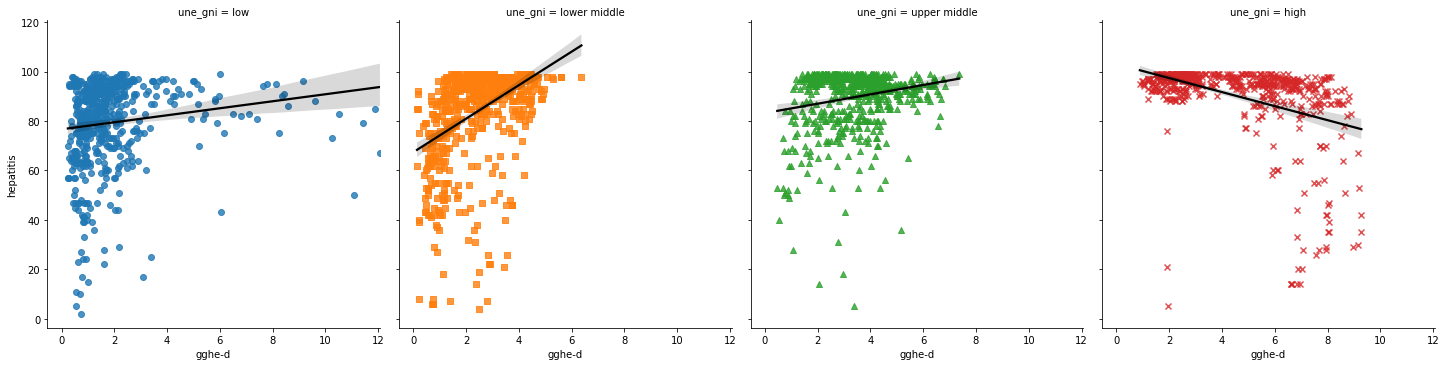

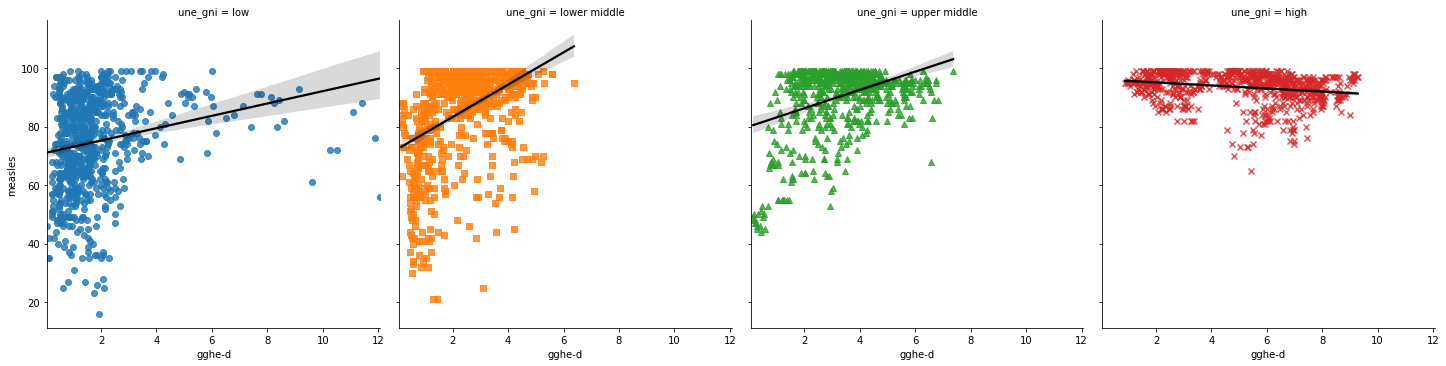

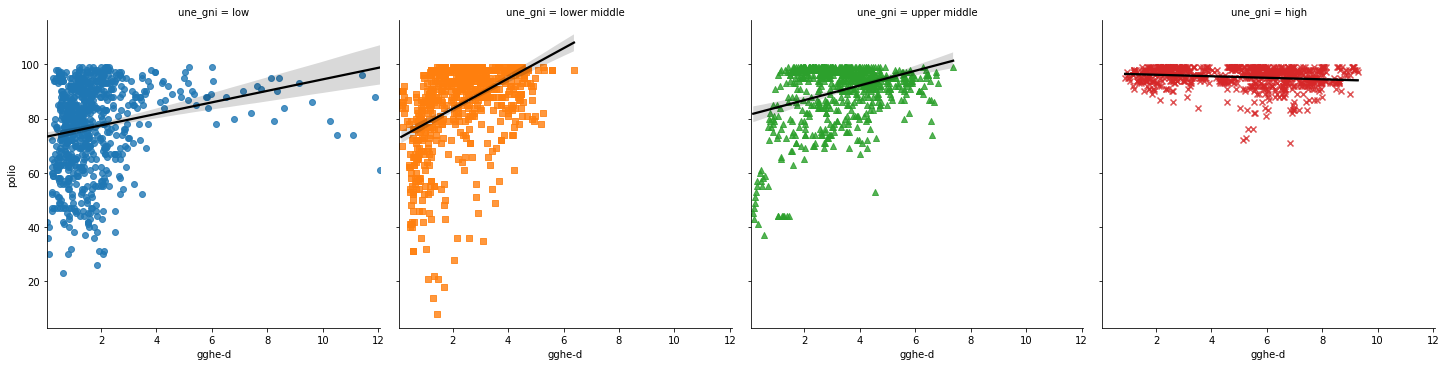

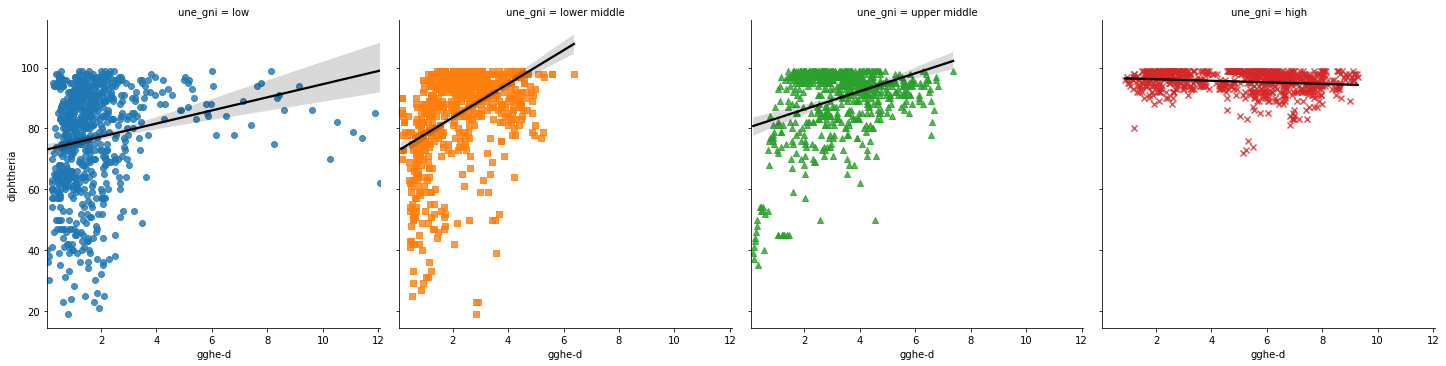

In [17]:
for i, col in enumerate(immunization_cols):
    sns.lmplot(data=immunization_gghe_df, x='gghe-d', y=col, hue='une_gni',
              markers=['o', 's', '^', 'x'], col='une_gni', line_kws={'color': 'black'})
plt.show()

In [16]:
plt.close('all')

- Sử dụng `scipt.stats.linregress` để tính công thức hồi quy và các thông tin khác như "hệ số xác định - R-squared", "p-value". Tạo DataFrame lưu kết quả trên.
    - Tạo DataFrame lưu các phương trình hồi quy.
        - Duyệt qua từng nhóm thu nhập quốc dân và từng cột thông tin tiêm phòng để tìm phương trình hồi quy. Các phương trình có công thức: $immunization = intercept + slope \times gni$
        - Lưu kết quả tính được và các cặp (loại vắc-xin, nhóm thu nhập).
        - Tạo DataFrame với:
            - index: MultiIndex gồm tầng 0 là loại vắc-xin, tầng 1 là nhóm thu nhập.
            - Mỗi cột là một thuộc tính của kết quả tìm công thức hồi quy.
        - Tính "R-squared" = "r-value"**2.

In [11]:
regress_result = []
indices = []
for col in immunization_cols:
    df = immunization_gghe_df[[col, 'gghe-d', 'une_gni']].dropna()
    for label in labels:
        indices.append((col, label))
        xy_df = df[df['une_gni'] == label]
        regress_result.append(stats.linregress(xy_df['gghe-d'], xy_df[col]))
        
regress_result_df = pd.DataFrame(regress_result, index=pd.MultiIndex.from_tuples(indices, names=('immunization', 'gni group')))
regress_result_df.rvalue = regress_result_df.rvalue ** 2
regress_result_df.rename(columns={'rvalue': 'R-squared'}, inplace=True)
regress_result_df

slope   intercept  R-squared        pvalue  \
immunization gni group                                                     
hepatitis    low           1.418151   76.653480   0.020015  7.535364e-04   
             lower middle  6.780702   67.349313   0.166840  3.964095e-28   
             upper middle  1.893767   83.209062   0.039927  2.220022e-07   
             high         -2.840588  103.063457   0.161754  5.926980e-23   
measles      low           2.110512   71.037903   0.042210  1.862034e-08   
             lower middle  5.520377   72.286546   0.168712  1.196836e-31   
             upper middle  3.128272   80.032944   0.143166  3.398910e-26   
             high         -0.521488   96.174843   0.047574  1.358176e-09   
polio        low           2.121549   73.244255   0.042803  1.473845e-08   
             lower middle  5.582231   72.427261   0.176691  3.267473e-33   
             upper middle  2.710360   81.354863   0.113671  8.240460e-21   
             high         -0.280448   96.714378   0.025836  8.950375e-06   
diphtheria   low           2.160093   72.985655   0.038919  6.812864e-08   
             lower middle  5.538332   72.511196   0.181396  3.846700e-34   
             upper middle  2.967127   80.349686   0.125494  5.996558e-23   
             high         -0.256737   96.729421   0.023682  2.141734e-05   

                             stderr  
immunization gni group               
hepatitis    low           0.418590  
             lower middle  0.588481  
             upper middle  0.361744  
             high          0.275230  
measles      low           0.371081  
             lower middle  0.449852  
             upper middle  0.284030  
             high          0.084975  
polio        low           0.370315  
             lower middle  0.442365  
             upper middle  0.280887  
             high          0.062715  
diphtheria   low           0.396210  
             lower middle  0.431917  
             upper middle  0.290696  
             high          0.060033

**Nhận xét:**
- Nhìn chung, ngoại trừ nhóm quốc gia có thu nhập cao, các quốc gia khác đều cho thấy việc tăng đầu tư cho lĩnh vực y tế có thể dẫn đến tăng tỷ lệ tiêm phòng cho trẻ em dưới 1 tuổi.
- Biến "gghe-d" trong các công thức hồi quy đều có ý nghĩa về mặt thống kê (p-value < 0.05) nhưng chỉ giải thích được khoảng 2 - 18% sự thay đổi của tỷ lệ tiêm các loại vắc-xin ở các nhóm thu nhập quốc dân khác nhau, cho thấy chỉ riêng sự đầu tư của chính phủ là không đủ để giải thích toàn bộ sự thay đổi trong tỷ lệ tiêm phòng. Đa số các mô hình hồi quy gần như không thể giải thích sự thay đổi của tỷ lệ tiêm phòng khi chỉ có mức đầu tư.
- Nhóm thu nhập quốc dân mức cao là nhóm quốc gia có tỷ lệ tiêm phòng cao nhất với tỷ lệ từ 80 - 100% ở tất cả loại vắc-xin. Với nhóm này có thể do đã có tỷ lệ tiêm phòng tốt từ năm 2000 nên việc thay đồi mức đầu tư vào y tế gần như không dẫn đến thay đổi nào của tỷ lệ tiêm phòng, chủ yếu là để duy trì số liệu tốt trong giai đoạn 2000 - 2016.
- Nhóm quốc gia thu nhập thấp đa số đầu tư từ 2 - 4% GDP cho lĩnh vực y tế. Khoảng đầu tư này có nhiều quốc gia thuộc nhóm đạt tỷ lệ 80 - 100% tiêm phòng, cho thấy có thể chương trình tiêm phòng là ưu tiên rất cao của các quốc gia trên, hay ngoài đầu tư của chính phủ còn có những yếu tố khác làm tăng tỷ lệ như sự trợ giúp từ các tổ chức quốc tế, các quốc gia có thu nhập cao hơn, ...
- Ảnh hưởng của riêng yếu tố đầu tư chính phủ có vẻ có ảnh hưởng lớn nhất ở các quốc gia thuộc nhóm thu nhập quốc dân trung bình thấp khi chỉ yếu tố đầu tư chính phủ đã có thể giải thích từ 15 - 18% thay đổi tỷ lệ tiêm phòng.
- Nhóm thu nhập thấp và cao nhất có một số điểm chú ý khi có quốc gia chi dến 10 - 12 %GDP cho lĩnh vực y tế nhưng tỷ lệ tiêm phòng khá thấp so với các nước cùng nhóm.

---
# 5. Nhìn lại quá trình làm đồ án
---
# 6. Tài liệu tham khảo:
- https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2016&start=2000
- https://data.worldbank.org/indicator/NY.GNP.PCAP.PP.CD?end=2016&start=2000
- https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress
- https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_tuples.html#pandas.MultiIndex.from_tuples